In [22]:
import pandas as pd
import re
from sklearn.ensemble import IsolationForest  # Para detección de anomalías
import plotly.express as px  # Para visualización
from datetime import datetime, timedelta

In [23]:
dir_path = "../process/"
#logs_df = pd.read_csv(f"{dir_path}external_test_data.csv", encoding='utf-8')
logs_df = pd.read_csv(f"{dir_path}train_data.csv", encoding='utf-8')
logs_df=logs_df[logs_df["Clean_Content"]!=""]
print(set(logs_df["source"]))
print(set(logs_df["Level"]))
print(logs_df.shape)
logs_df.head()

{'Hadoop', 'Android', 'Zookeeper', 'BGL', 'Apache'}
{'Advertencia', 'Informativo', 'Error'}
(9090, 6)


,Content,Level,datetime,content_length,source,Clean_Content
0,setLightsOn(true),Informativo,2024-03-17 16:14:21.261,2,Android,setlightson true
1,suspendAutohide,Informativo,2024-03-17 16:13:46.350,1,Android,suspendautohide
2,setLightsOn(true),Informativo,2024-03-17 16:14:01.964,2,Android,setlightson true
3,setSystemUiVisibility vis=0 mask=1 oldVal=4000...,Informativo,2024-03-17 16:14:09.564,12,Android,setsystemuivisibility vis mask oldval newval d...
4,userActivityNoUpdateLocked: eventTime=26199130...,Informativo,2024-03-17 16:16:06.670,5,Android,useractivitynoupdatelocked eventtime event fla...


In [24]:
logs_dfA=logs_df[logs_df["Level"]=="Advertencia"]
logs_dfE=logs_df[logs_df["Level"]=="Error"]
logs_dfI=logs_df[logs_df["Level"]=="Informativo"]

# Advertencia

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
logs_dfA = logs_dfA.dropna()
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')  # unigrams y bigrams
X = vectorizer.fit_transform(logs_dfA['Clean_Content'])  # Esta es tu columna limpia
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)


In [26]:
# Mostrar top 20 términos más frecuentes
for word, freq in words_freq[:20]:
    print(f"{word}: {freq}")

msra: 908
sa: 908
msra sa: 908
id: 580
address: 540
old: 493
change: 456
detected: 454
new: 454
address change: 454
change detected: 454
detected old: 454
old msra: 454
sa new: 454
new msra: 454
address change detected: 454
change detected old: 454
detected old msra: 454
old msra sa: 454
msra sa new: 454


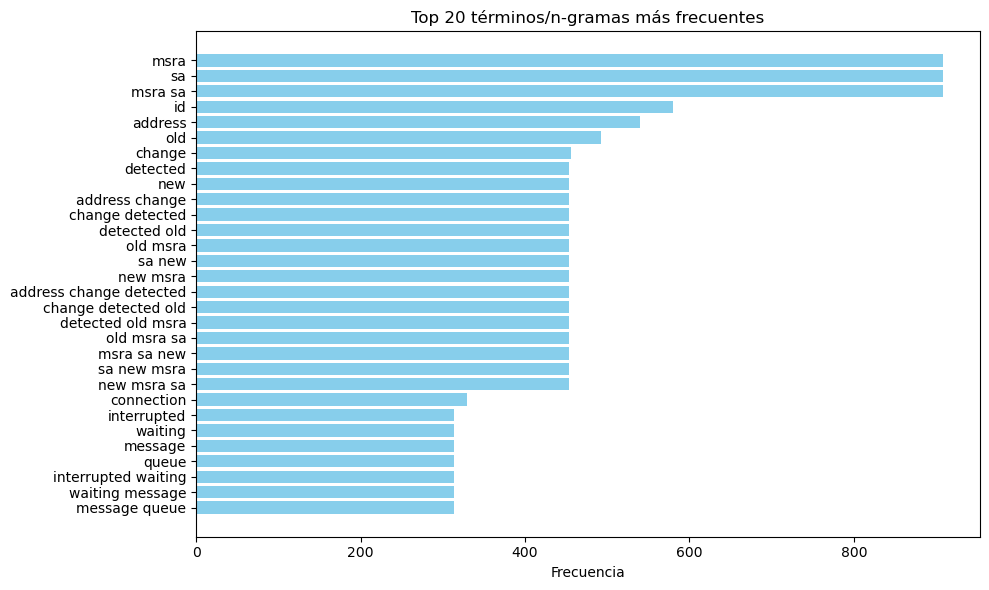

In [27]:
import matplotlib.pyplot as plt

# Seleccionar los 20 términos más frecuentes
top_words = words_freq[:30]
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.barh(words[::-1], frequencies[::-1], color='skyblue')  # Revertimos para mostrar el más frecuente arriba
plt.xlabel('Frecuencia')
plt.title('Top 20 términos/n-gramas más frecuentes')
plt.tight_layout()
plt.show()


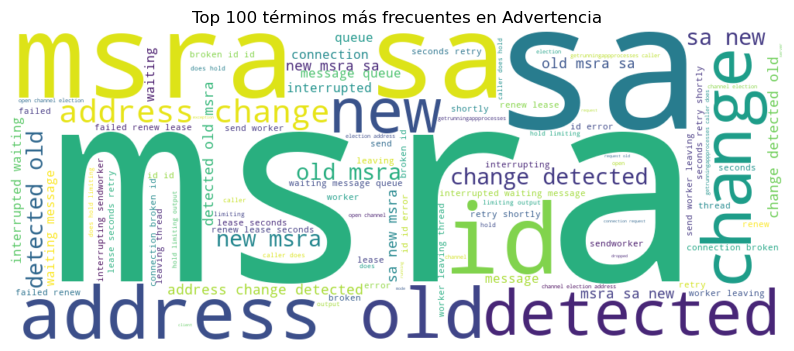

In [28]:
#! pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
top_words = words_freq[:100]
# Crear diccionario con palabras y frecuencias
word_freq_dict = dict(top_words)

# Crear la nube de palabras
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 términos más frecuentes en Advertencia')
plt.show()


# Error

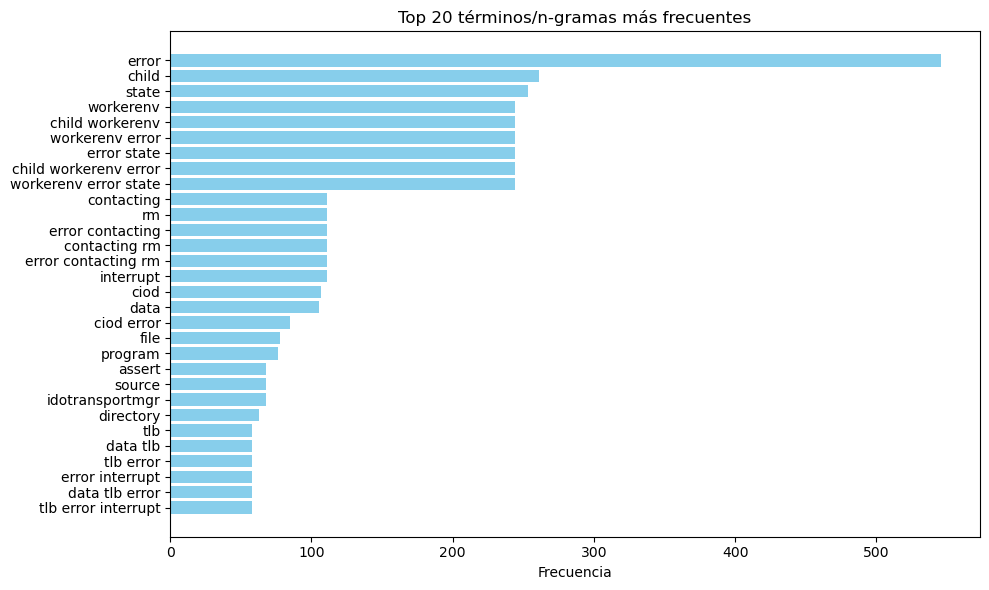

In [32]:
logs_dfE = logs_dfE.dropna()

logs_dfE['cleaned'] = logs_dfE['Clean_Content'].astype(str)
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(logs_dfE['Clean_Content'])

sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
import matplotlib.pyplot as plt

# Seleccionar los 20 términos más frecuentes
top_words = words_freq[:30]
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.barh(words[::-1], frequencies[::-1], color='skyblue')  # Revertimos para mostrar el más frecuente arriba
plt.xlabel('Frecuencia')
plt.title('Top 20 términos/n-gramas más frecuentes')
plt.tight_layout()
plt.show()


In [35]:
# Mostrar top 20 términos más frecuentes
for word, freq in words_freq[:37]:
    print(f"{word}: {freq}")

error: 546
child: 261
state: 253
workerenv: 244
child workerenv: 244
workerenv error: 244
error state: 244
child workerenv error: 244
workerenv error state: 244
contacting: 111
rm: 111
error contacting: 111
contacting rm: 111
error contacting rm: 111
interrupt: 111
ciod: 107
data: 105
ciod error: 85
file: 78
program: 76
assert: 68
source: 68
idotransportmgr: 68
directory: 63
tlb: 58
data tlb: 58
tlb error: 58
error interrupt: 58
data tlb error: 58
tlb error interrupt: 58
loading: 58
invalid: 58
image: 58
error loading: 58
program image: 58
ciod error loading: 58
missing: 57


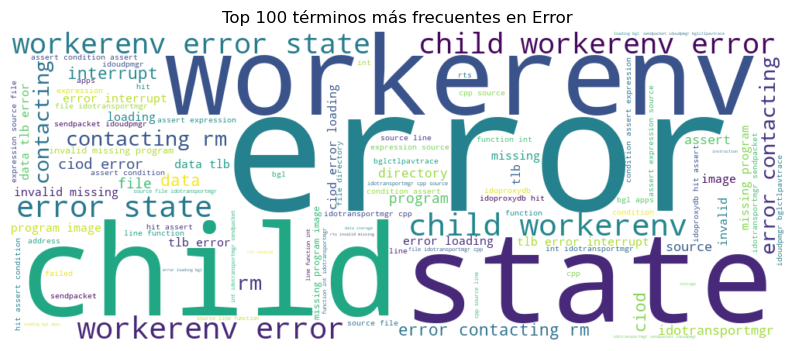

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
top_words = words_freq[:100]
# Crear diccionario con palabras y frecuencias
word_freq_dict = dict(top_words)

# Crear la nube de palabras
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 términos más frecuentes en Error')
plt.show()


# Informativo

In [37]:

logs_dfI['cleaned'] = logs_dfI['Clean_Content'].astype(str)
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(logs_dfI['cleaned'])

# Sumamos las frecuencias
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)


/tmp/ipykernel_25661/4016700938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logs_dfI['cleaned'] = logs_dfI['Clean_Content'].astype(str)


In [38]:
# Mostrar top 20 términos más frecuentes
for word, freq in words_freq[:77]:
    print(f"{word}: {freq}")

false: 906
slot: 770
child: 762
scoreboard: 762
child scoreboard: 762
scoreboard slot: 762
child scoreboard slot: 762
core: 751
generating: 721
generating core: 721
true: 656
com: 441
rect: 404
connection: 395
android: 355
server: 352
policy: 340
taskattempt: 340
received: 324
request: 301
received connection: 299
connection request: 299
received connection request: 299
time: 298
mask: 292
iar: 287
dear: 280
iar dear: 280
progress: 277
progress taskattempt: 277
com android: 266
microseconds: 242
alignment: 238
exceptions: 238
alignment exceptions: 238
conf: 229
properties: 229
workerenv: 227
init: 227
ok: 227
httpd: 227
workerenv init: 227
init ok: 227
ok httpd: 227
httpd conf: 227
conf properties: 227
workerenv init ok: 227
init ok httpd: 227
ok httpd conf: 227
httpd conf properties: 227
vis: 221
input: 221
critical: 215
interrupts: 215
critical input: 215
diff: 201
setsystemuivisibility: 200
oldval: 200
newval: 200
fullscreenstackvis: 200
dockedstackvis: 200
fullscreenstackbounds: 20

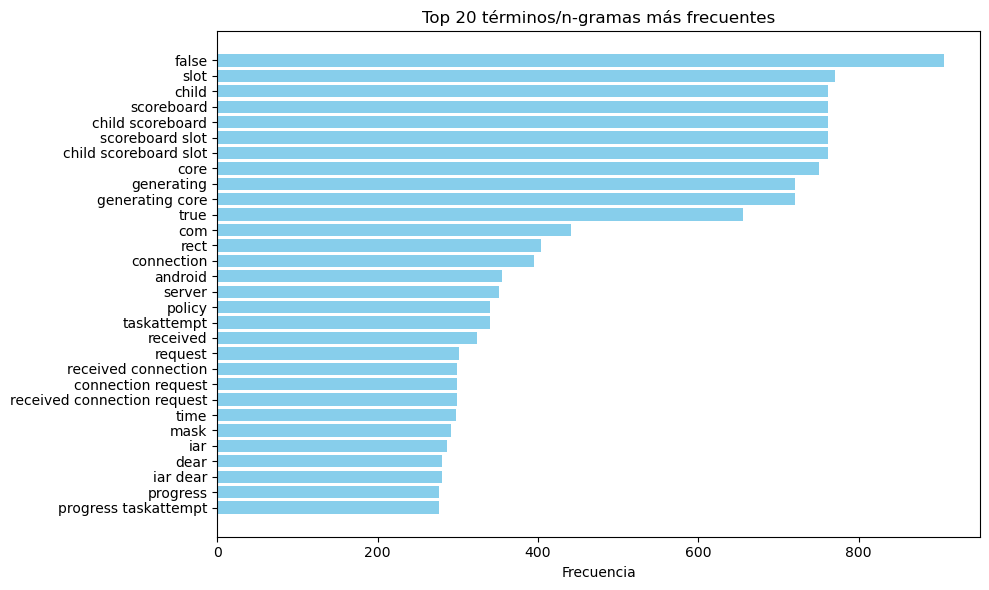

In [39]:
import matplotlib.pyplot as plt

# Seleccionar los 20 términos más frecuentes
top_words = words_freq[:30]
words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.barh(words[::-1], frequencies[::-1], color='skyblue')  # Revertimos para mostrar el más frecuente arriba
plt.xlabel('Frecuencia')
plt.title('Top 20 términos/n-gramas más frecuentes')
plt.tight_layout()
plt.show()


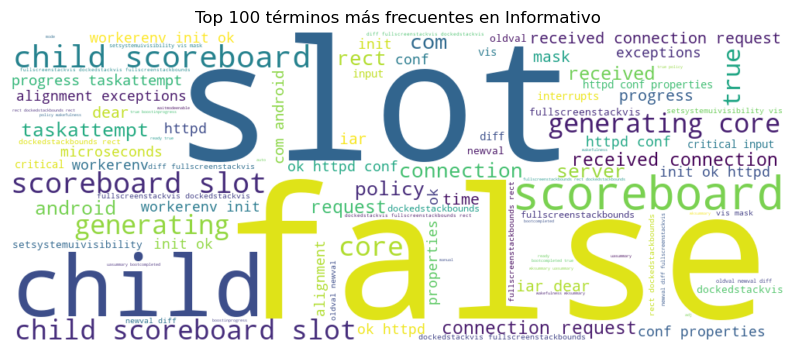

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
top_words = words_freq[:100]
# Crear diccionario con palabras y frecuencias
word_freq_dict = dict(top_words)

# Crear la nube de palabras
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 términos más frecuentes en Informativo')
plt.show()


In [41]:
logs_dfI[logs_dfI['cleaned']=="readytruepolicywakefulnesswksummaryxuasummaryxbootcompletedtrueboostinprogressfalsewaitmodeenablefalsemodefalsemanualautoadjuserid"]

,Content,Level,datetime,content_length,source,Clean_Content,cleaned
